In [1]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义常量
l = 0.55  # l 的值
pi = np.pi

# 定义微分方程
def system(t, y):
    r, alpha = y
    # 方程1中的 d(alpha)/dt
    dalpha_dt = - np.sqrt(1 / (r**2 * (1 + (l**2) / (4 * pi**2 * r**2))**2))
    # 方程2中的 d(r)/dt
    dr_dt = l * dalpha_dt / (2 * pi)
    return [dr_dt, dalpha_dt]

# 初始条件
r0 = 8.8
alpha0 = 32 * pi
y0 = [r0, alpha0]

# 时间范围
t_span = [0,400]  # 从 t=0 到 t=10
t_eval = np.linspace(t_span[0], t_span[1], 401)

# 求解微分方程
sol = solve_ivp(system, t_span, y0, t_eval=t_eval)

# 提取结果
r_sol = sol.y[0]
alpha_sol = sol.y[1]
t_sol = sol.t

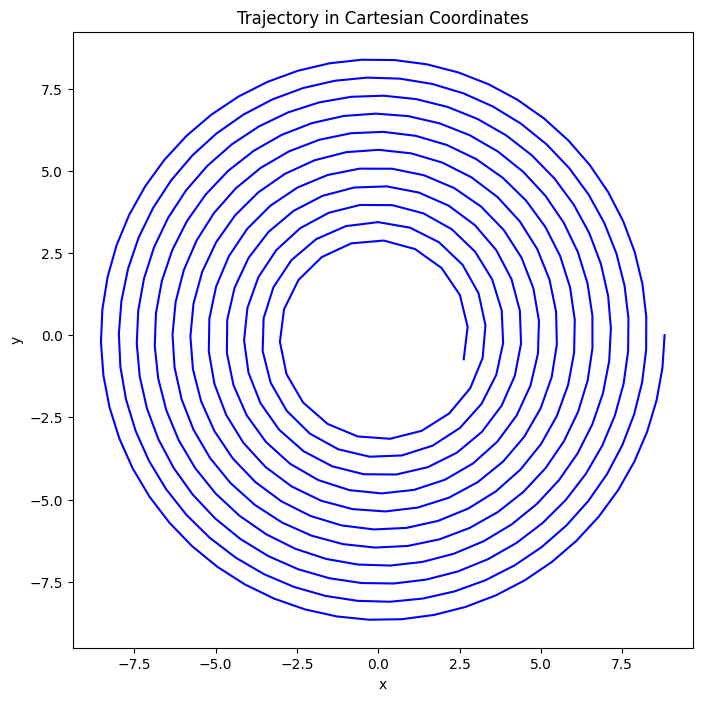

In [2]:
# 绘制 x = r*cos(alpha) 和 y = r*sin(alpha) 的图像
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Trajectory (x, y)', color='blue')
plt.title('Trajectory in Cartesian Coordinates')
plt.xlabel('x')
plt.ylabel('y')
# plt.grid(True)
# plt.axis('equal')  # 确保比例尺相同
plt.show()

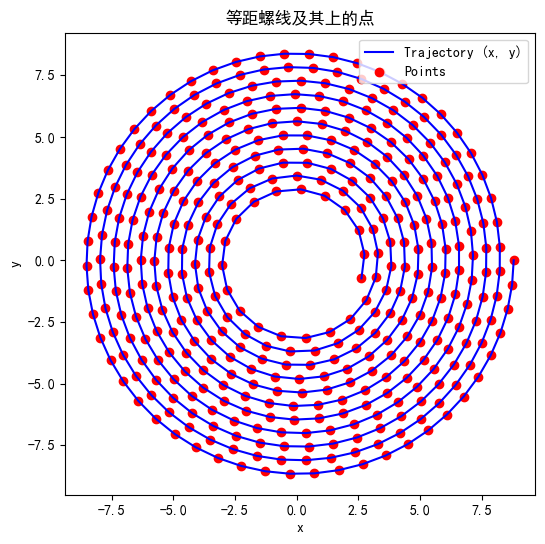

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 将极坐标转换为笛卡尔坐标
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

plt.figure(figsize=(8, 6))

# 绘制轨迹
plt.plot(x, y, label='Trajectory (x, y)', color='blue')

# 绘制点
plt.scatter(x, y, color='red', marker='o', label='Points')

# 图形设置
plt.title('等距螺线及其上的点')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
# plt.grid(True)
plt.legend()
plt.show()

In [4]:
import numpy as np
from scipy.optimize import fsolve

# 螺旋线参数
a = 0  # 初始半径
p = 0.55  # 螺距为 0.55 米
b = p / (2 * np.pi)  # b 参数由螺距 p 确定

# 已知弦长公式
def chord_length(theta1, theta2):
    r1 = a + b * theta1
    r2 = a + b * theta2
    return np.sqrt(r1**2 + r2**2 - 2 * r1 * r2 * np.cos(theta2 - theta1))

# 找到下一个角度，使得两个点之间的弦长等于 L
def find_next_angle_min(theta_2, L):
    # 目标函数：根据弦长公式求解 theta1，使得弦长等于 L
    def objective(theta1):
        return chord_length(theta1, theta_2) - L
    
    # 使用 fsolve 求解 theta1，使弦长等于 L
    theta_1_initial_guess = theta_2 - 0.1  # 初始猜测角度
    theta_1_solution = fsolve(objective, theta_1_initial_guess)
    
    # 确保 theta_1 是有效解，即小于 theta_2
    theta_1 = theta_1_solution[0]
    if theta_1 >= theta_2:
        # 如果得到的解大于或等于 theta_2，重新计算一个更小的初始猜测角度
        theta_1_initial_guess = theta_2 - 2 * np.pi
        theta_1_solution = fsolve(objective, theta_1_initial_guess)
        theta_1 = theta_1_solution[0]
    
    return theta_1

In [5]:
import pandas as pd
points_2 = pd.DataFrame(columns=['t','alpha'])
points_1 = []
L=1
r1 = 32 * np.pi
for i in range(401):
    points_2 = points_2.append({'t': i, 'alpha':r1}, ignore_index=True)
    points_1.append([i, r1])
    r1 = find_next_angle_min(r1,L)

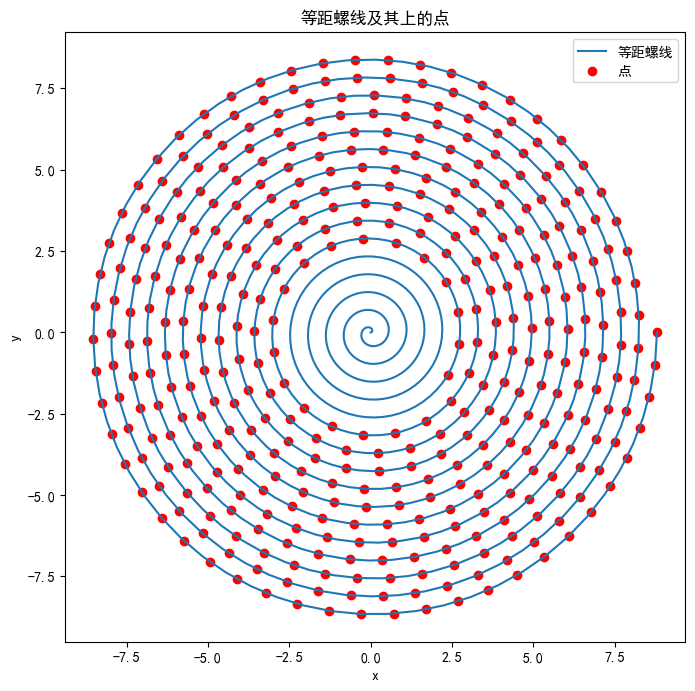

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题
def plot_spiral_with_points(point):
    # 等距螺线的参数
    p = 0.55  # 螺距
    b = p / (2 * np.pi)  # b参数由螺距p确定
    a = 0  # 初始半径

    # 生成螺线的角度范围
    theta = np.linspace(0, 2 * np.pi * 16, 1000)  # 从0到16圈

    # 计算螺线半径
    r = a + b * theta

    # 将极坐标转换为笛卡尔坐标
    x_spiral = r * np.cos(theta)
    y_spiral = r * np.sin(theta)

    # 提取点数据
    x_points = []
    y_points = []
    for i, theta_point in point:
        r_point = a + b * theta_point
        x_point = r_point * np.cos(theta_point)
        y_point = r_point * np.sin(theta_point)
        x_points.append(x_point)
        y_points.append(y_point)

    # 绘制螺线
    plt.figure(figsize=(8, 8))
    plt.plot(x_spiral, y_spiral, label="等距螺线")
    
    # 绘制点
    plt.scatter(x_points, y_points, color='red', marker='o', label='点')

    # 图形设置
    plt.title("等距螺线及其上的点")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal', adjustable='box')
#     plt.grid(True)
    plt.legend()
    plt.show()

plot_spiral_with_points(points_1)

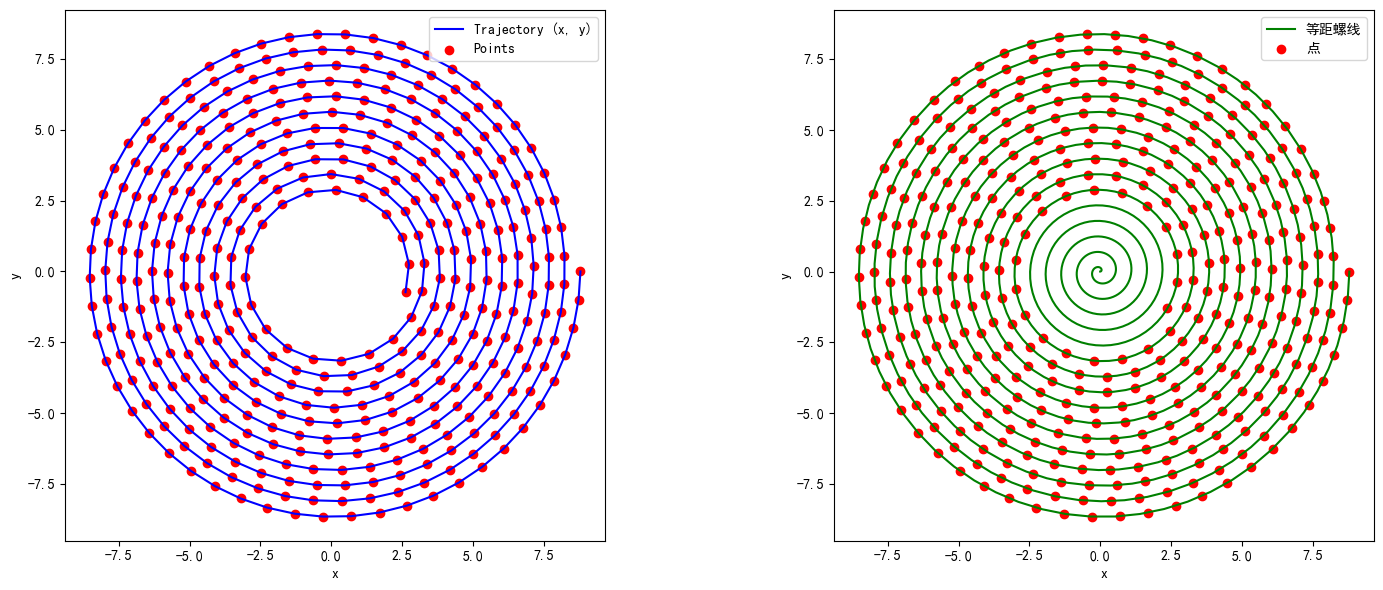

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 将极坐标转换为笛卡尔坐标
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

# 等距螺线的参数
p = 0.55  # 螺距
b = p / (2 * np.pi)  # b参数由螺距p确定
a = 0  # 初始半径

# 生成螺线的角度范围
theta = np.linspace(0, 2 * np.pi * 16, 1000)  # 从0到16圈

# 计算螺线半径
r = a + b * theta

# 将极坐标转换为笛卡尔坐标
x_spiral = r * np.cos(theta)
y_spiral = r * np.sin(theta)

# 提取点数据
# 提取点数据
x_points = []
y_points = []
for i, theta_point in points_1:
    r_point = a + b * theta_point
    x_point = r_point * np.cos(theta_point)
    y_point = r_point * np.sin(theta_point)
    x_points.append(x_point)
    y_points.append(y_point)

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 第一个子图：绘制轨迹和点
axs[0].plot(x, y, label='Trajectory (x, y)', color='blue')
axs[0].scatter(x, y, color='red', marker='o', label='Points')
# axs[0].set_title('微分计算精确求解')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_aspect('equal', adjustable='box')
# axs[0].grid(True)
axs[0].legend()

# 第二个子图：绘制螺线和点
axs[1].plot(x_spiral, y_spiral, label="等距螺线", color='green')  # 颜色修改为绿色以便区分
axs[1].scatter(x_points, y_points, color='red', marker='o', label='点')
# axs[1].set_title("等距螺线近似求解")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_aspect('equal', adjustable='box')
# axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


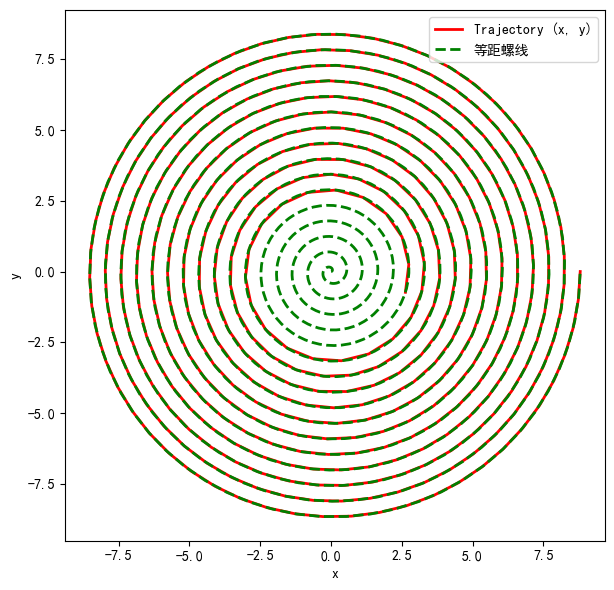

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 将极坐标转换为笛卡尔坐标
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

# 等距螺线的参数
p = 0.55  # 螺距
b = p / (2 * np.pi)  # b参数由螺距p确定
a = 0  # 初始半径

# 生成螺线的角度范围
theta = np.linspace(0, 2 * np.pi * 16, 1000)  # 从0到16圈

# 计算螺线半径
r = a + b * theta

# 将极坐标转换为笛卡尔坐标
x_spiral = r * np.cos(theta)
y_spiral = r * np.sin(theta)

# 提取点数据
x_points = []
y_points = []
for i, theta_point in points_1:
    r_point = a + b * theta_point
    x_point = r_point * np.cos(theta_point)
    y_point = r_point * np.sin(theta_point)
    x_points.append(x_point)
    y_points.append(y_point)

# 创建子图
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制轨迹和点
ax.plot(x, y, label='Trajectory (x, y)', color='red', linestyle='-', linewidth=2)
# ax.scatter(x, y, color='blue', marker='o', label='Trajectory Points')

# 绘制等距螺线和点
ax.plot(x_spiral, y_spiral, label='等距螺线', color='green', linestyle='--', linewidth=2)
# ax.scatter(x_points, y_points, color='red', marker='x', label='Spiral Points')

# 设置图像标题和标签
# ax.set_title('标准螺旋线条与微分曲线对比图')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal', adjustable='box')
# ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


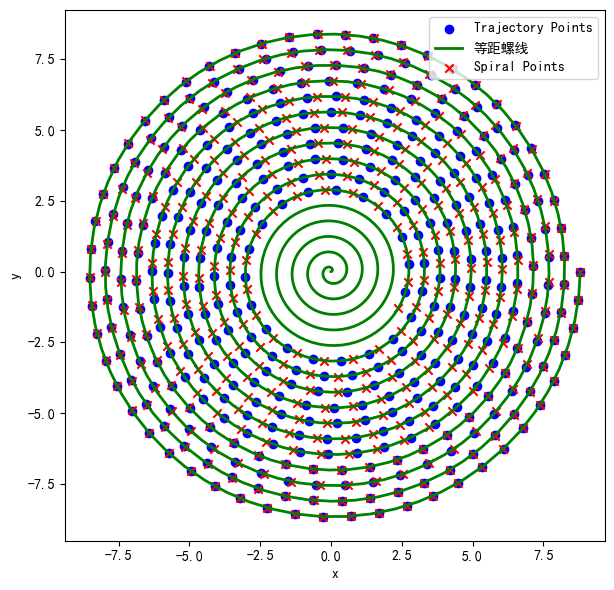

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 将极坐标转换为笛卡尔坐标
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

# 等距螺线的参数
p = 0.55  # 螺距
b = p / (2 * np.pi)  # b参数由螺距p确定
a = 0  # 初始半径

# 生成螺线的角度范围
theta = np.linspace(0, 2 * np.pi * 16, 1000)  # 从0到16圈

# 计算螺线半径
r = a + b * theta

# 将极坐标转换为笛卡尔坐标
x_spiral = r * np.cos(theta)
y_spiral = r * np.sin(theta)

# 提取点数据
x_points = []
y_points = []
for i, theta_point in points_1:
    r_point = a + b * theta_point
    x_point = r_point * np.cos(theta_point)
    y_point = r_point * np.sin(theta_point)
    x_points.append(x_point)
    y_points.append(y_point)

# 创建子图
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制轨迹和点
# ax.plot(x, y, label='Trajectory (x, y)', color='red', linestyle='-', linewidth=2)
ax.scatter(x, y, color='blue', marker='o', label='Trajectory Points')

# 绘制等距螺线和点
ax.plot(x_spiral, y_spiral, label='等距螺线', color='green', linestyle='-', linewidth=2)
ax.scatter(x_points, y_points, color='red', marker='x', label='Spiral Points')

# 设置图像标题和标签
# ax.set_title('标准螺旋线条与微分曲线对比图')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal', adjustable='box')
# ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


# 误差为：

In [10]:
((alpha_sol[-1]-points_1[-1][1]) *180)/(360*np.pi )

0.03674270183386438